### Project - Predict heart attack based on phisiological and physical parameters of the patient

https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [1]:
!wget https://raw.githubusercontent.com/carcrupe/TFM/master/data/heart_parameters_data.csv

--2020-08-02 17:05:56--  https://raw.githubusercontent.com/carcrupe/TFM/master/heart_parameters_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2941524 (2.8M) [text/plain]
Saving to: ‘heart_parameters_data.csv.1’

heart_parameters_da 100%[===================>]   2.80M  18.3MB/s    in 0.2s    

2020-08-02 17:05:56 (18.3 MB/s) - ‘heart_parameters_data.csv.1’ saved [2941524/2941524]



In [2]:
# Get requirements for this notebook from repository
!wget https://raw.githubusercontent.com/carcrupe/TFM/master/requirements/requirements_exploring.txt

--2020-08-02 17:05:58--  https://raw.githubusercontent.com/carcrupe/TFM/master/requirements_exploring.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30 [text/plain]
Saving to: ‘requirements_exploring.txt.1’

requirements_explor 100%[===================>]      30  --.-KB/s    in 0s      

2020-08-02 17:05:58 (1.50 MB/s) - ‘requirements_exploring.txt.1’ saved [30/30]



In [3]:
!pip install -r requirements_exploring.txt

### Action plan - Explore and Analyze

1. Read, explore and clean the dataset. Evaluate missing & duplicate Values
2. Evaluate continuous features, distributions and outliers
3. Plot target relations between categorical features to better understand the behaviour of the data.
4. Feature engineering with continuous features
5. Save organized and cleaned data for posterior machine learning modeling

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df_stroke = pd.read_csv('heart_parameters_data.csv', sep=';')
df_stroke.dropna(inplace=True)
print('There are {} datapoints in the dataset with {} features listed as {}:'
          .format(df_stroke.shape[0], df_stroke.shape[1], df_stroke.columns.values))
original_size=df_stroke.shape[0]

There are 70000 datapoints in the dataset with 13 features listed as ['id' 'age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol'
 'gluc' 'smoke' 'alco' 'active' 'cardio']:


In [11]:
#Set appropiate column names for second dataset, according to the data in df_stroke
columns = ['Id','Age', 'Sex', 'Height', 'Weight','SystolicPressure', 'DiastolicPressure', 'Cholesterol', 'Diabetes', 'Smoker', 'Alcoholic',
           'ActiveSport','Target']
df_stroke.columns=columns

In [12]:
df_stroke.head()

,Id,Age,Sex,Height,Weight,SystolicPressure,DiastolicPressure,Cholesterol,Diabetes,Smoker,Alcoholic,ActiveSport,Target
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
# We can see the type of each feature and that there are no null values.
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 70000 non-null  int64  
 1   Age                70000 non-null  int64  
 2   Sex                70000 non-null  int64  
 3   Height             70000 non-null  int64  
 4   Weight             70000 non-null  float64
 5   SystolicPressure   70000 non-null  int64  
 6   DiastolicPressure  70000 non-null  int64  
 7   Cholesterol        70000 non-null  int64  
 8   Diabetes           70000 non-null  int64  
 9   Smoker             70000 non-null  int64  
 10  Alcoholic          70000 non-null  int64  
 11  ActiveSport        70000 non-null  int64  
 12  Target             70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


In [14]:
#Age was given in days, transform to years and round to closest integer
df_stroke['Age']=(df_stroke['Age']/365).astype(int) 

# Column ID is not useful for data modeling, we can just remove it
df_stroke.drop(axis=1, columns=['Id'], inplace=True)

In [15]:
# After removing column Id and converting days to years, I have generated 3208 duplicated observations.
df_stroke[df_stroke.duplicated()==True].shape

(3208, 12)

In [16]:
# Remove duplicates and check size of the data set again
df_stroke.drop_duplicates(inplace=True) 
cleaned_size = df_stroke.shape
cleaned_size

(66792, 12)

In [17]:
# Print the number of lost samples after cleaning the data set. 5% seems to be a reasonable loss.
print ('Number of lost samples after cleaning null and duplicated observations in heart_parameters_data.csv: {:,.0f}%'.format((1- cleaned_size[0]/original_size)*100))

Number of lost samples after cleaning null and duplicated observations in heart_parameters_data.csv: 5%


In [18]:
target = df_stroke.groupby(['Target'])

In [19]:
#We see that there are three parameters which are quite higher in mean when there is a stroke - SystolicPressure, DiastolicPressure 
# and Cholesterol
target.mean()

,Age,Sex,Height,Weight,SystolicPressure,DiastolicPressure,Cholesterol,Diabetes,Smoker,Alcoholic,ActiveSport
Target,,,,,,,,,,,
0,51.220191,1.355471,164.424123,71.901184,120.528728,84.634743,1.231479,1.187429,0.098960,0.059419,0.810025
1,54.422835,1.356915,164.263212,77.018998,137.528734,109.660457,1.526921,1.282514,0.085632,0.053315,0.787588


In [20]:
# Let us evaluate continuous values to see if we have outliers.
continuous = ['Age', 'Height', 'Weight','SystolicPressure', 'DiastolicPressure']
df_stroke[continuous].describe()

,Age,Height,Weight,SystolicPressure,DiastolicPressure
count,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000
mean,52.859729,164.341748,74.521160,129.231585,97.446221
std,6.803670,8.333904,14.580675,157.649354,192.906434
min,29.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,83.000000,140.000000,90.000000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000


We can see that there are some values that do not correspond to a real situation. We have negative systolic and diastolic pressures, weigth of 10Kg for a 29 year old person or maximum systolic pressure of 16.020. These values should be considered not only outliers but also measurement errors, since they could never be true for a patient. Therefore, I will deal with them in the cells below.

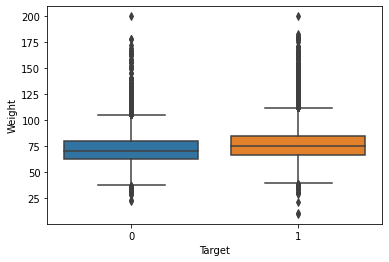

In [21]:
# We can see there are a lot of outliers for the weigth feature. 
sns.boxplot(x='Target',y='Weight',data=df_stroke);

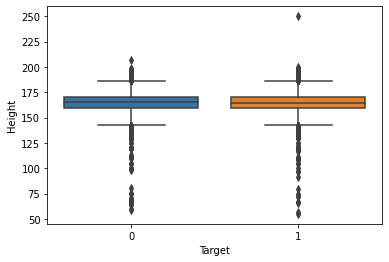

In [22]:
# The same happens with height, having many inferior outliers
sns.boxplot(x='Target',y='Height',data=df_stroke);

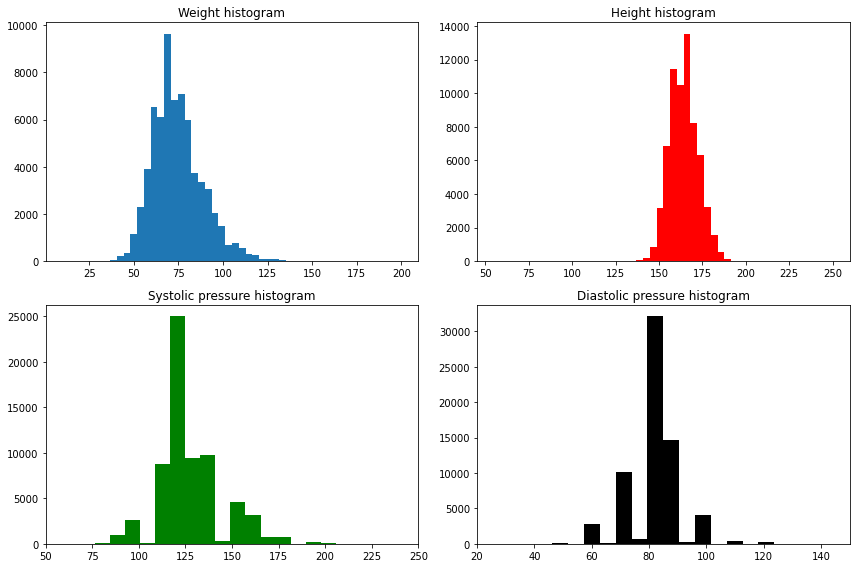

In [23]:
# I will represent histrograms for all continous values but age
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

axes[0,0].hist(df_stroke['Weight'], bins=50);
axes[0,0].set_title('Weight histogram')

axes[0,1].hist(df_stroke['Height'], bins=50, color='r');
axes[0,1].set_title('Height histogram')

axes[1,0].hist(df_stroke['SystolicPressure'], bins=2000, color='g');
axes[1,0].set_xlim([50,250])
axes[1,0].set_title('Systolic pressure histogram')

axes[1,1].hist(df_stroke['DiastolicPressure'], bins=2000, color='k');
axes[1,1].set_xlim([20,150])
axes[1,1].set_title('Diastolic pressure histogram')


figure.tight_layout()


As a next step, I will delete all observations that are considered outliers. By convention, this means all observations that are below Q1-1.5 IQR or above Q3+1.5 IQR. I will define a function to calculate IQR and number of outliers for a given feature.

In [24]:

def quantify_outliers(df):
    #I will create a data frame with each feature and only the values Q1-1.5*IQR and Q3+1.5*IQR, 
    #for further filtering and cleaning
    feature_dist_limits = pd.DataFrame(columns=df.columns, index=['Q1-1.5*IQR', 'Q3+1.5*IQR'])
    for feature in df.columns:
        feature_data = df[feature]        
        # 25th percentile of the data of the given feature
        Q1 = np.percentile(feature_data, 25.)
        # 75th percentile of the data of the given feature 
        Q3 = np.percentile(feature_data, 75.) 
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 # As defined previously
        inf_outlier = Q1 - outlier_step
        sup_outlier = Q3 + outlier_step
        feature_dist_limits[feature] = ([inf_outlier,sup_outlier])
        meaningful_data = ((feature_data >= inf_outlier) & (feature_data <= sup_outlier))
        outliers = feature_data[~meaningful_data].index.tolist()        
        print('The number of outliers for feature {} is {}'.format(feature, len(outliers)))
    return feature_dist_limits

In [25]:
outliers = quantify_outliers(df_stroke[['Height', 'Weight', 'SystolicPressure', 'DiastolicPressure']])

The number of outliers for feature Height is 519
The number of outliers for feature Weight is 1282
The number of outliers for feature SystolicPressure is 1433
The number of outliers for feature DiastolicPressure is 4617


In [26]:
outliers

,Height,Weight,SystolicPressure,DiastolicPressure
Q1-1.5*IQR,142.5,38.0,90.0,65.0
Q3+1.5*IQR,186.5,110.0,170.0,105.0


In [27]:
# We have the limits of each feature taking into account the inter quartile range
# I will delete all of them to have a more realistic dataset for modeling

#Delete diastolic pressures out of range
df_stroke = df_stroke[df_stroke['DiastolicPressure'] >= outliers['DiastolicPressure'][0]]
df_stroke = df_stroke[df_stroke['DiastolicPressure'] <= outliers['DiastolicPressure'][1]]

#Delete systolic pressures out of range and the ones lower than diastolic pressure, since this cannot happen
df_stroke = df_stroke[df_stroke['SystolicPressure']>= outliers['SystolicPressure'][0]]
df_stroke = df_stroke[df_stroke['SystolicPressure']<= outliers['SystolicPressure'][1]]
df_stroke = df_stroke[df_stroke['SystolicPressure']>df_stroke['DiastolicPressure']]

#Delete weight out of range
df_stroke = df_stroke[df_stroke['Weight'] >= outliers['Weight'][0]]
df_stroke = df_stroke[df_stroke['Weight'] <= outliers['Weight'][1]]

#Delete height out of range
df_stroke = df_stroke[df_stroke['Height'] >= outliers['Height'][0]]
df_stroke = df_stroke[df_stroke['Height'] <= outliers['Height'][1]]

cleaned_data = df_stroke.shape[0]
cleaned_data

59772

In [28]:
print ('Number of lost samples after cleaning nulls, duplicates and removing outliers in heart_parameters_data.csv: {:,.0f}%'.format((1- cleaned_data/original_size)*100))

Number of lost samples after cleaning nulls, duplicates and removing outliers in heart_parameters_data.csv: 15%


In [29]:
# Data is finally clean and ready for modeling. I will evaluate correlation between features and 
# relationships of the target with the categorical columns
df_stroke.describe()

,Age,Sex,Height,Weight,SystolicPressure,DiastolicPressure,Cholesterol,Diabetes,Smoker,Alcoholic,ActiveSport,Target
count,59772.000000,59772.000000,59772.000000,59772.000000,59772.000000,59772.000000,59772.000000,59772.000000,59772.000000,59772.000000,59772.000000,59772.000000
mean,52.936291,1.356321,164.411095,73.737094,126.797163,81.826625,1.377652,1.232785,0.091013,0.055126,0.798468,0.508298
std,6.781883,0.478916,7.660220,12.760719,14.562676,7.834424,0.688535,0.580232,0.287629,0.228228,0.401148,0.499935
min,29.000000,1.000000,143.000000,38.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,186.000000,110.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Let us plot categorical features to see the dependency with the target

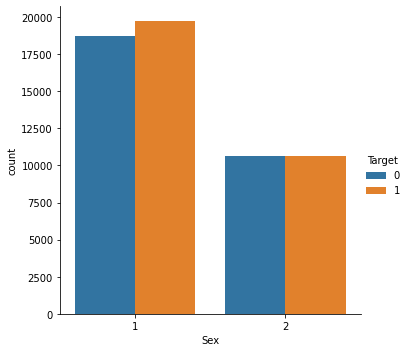

In [30]:
# Sex feature does not seem to be relevant for detecting a stroke
sns.catplot(kind = 'count', data = df_stroke, x = 'Sex', hue = 'Target', ax=axes[0,0]);



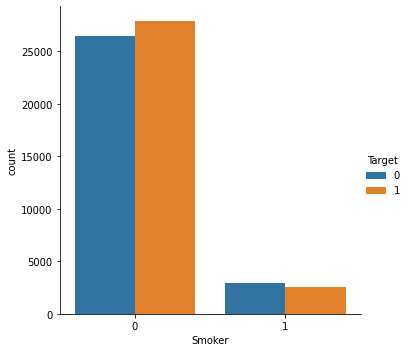

In [31]:
# Smoker feature does not seem to be relevant for detecting a stroke
sns.catplot(kind = 'count', data = df_stroke, x = 'Smoker', hue = 'Target');

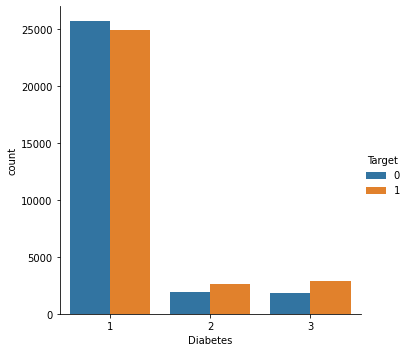

In [32]:
# Patients with higher glucosel levels seem to be more likely to have a stroke
sns.catplot(kind = 'count', data = df_stroke, x = 'Diabetes', hue = 'Target');

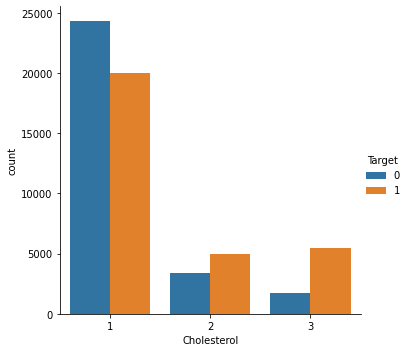

In [33]:
# For above normal cholesterol values, we have higher amount of strokes compared to healthy patients, as expected.
sns.catplot(kind = 'count', data = df_stroke, x = 'Cholesterol', hue = 'Target');

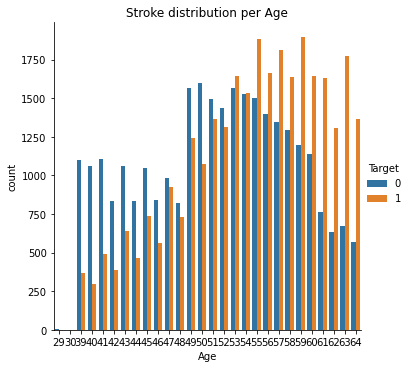

In [34]:
# Plot the target depending on the Age. As we could also expect, the older the patient, the higher the number of strokes.
sns.catplot(kind = 'count', data = df_stroke, x = 'Age', hue = 'Target', order = df_stroke['Age'].sort_values().unique());
plt.title('Stroke distribution per Age');

## Feature engineering

I will calculate the body mass index (BMI) and the pulse derived from the pressures. Hopefully, we can get better insights.

In [35]:
df_stroke['BMI']= (df_stroke['Weight']) / (df_stroke['Height']/100)**2 

In [36]:
df_stroke['Pulse']= np.subtract(df_stroke['SystolicPressure'], df_stroke['DiastolicPressure'])

In [37]:
df_stroke.head()

,Age,Sex,Height,Weight,SystolicPressure,DiastolicPressure,Cholesterol,Diabetes,Smoker,Alcoholic,ActiveSport,Target,BMI,Pulse
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50
5,60,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,40


# Feature Selection

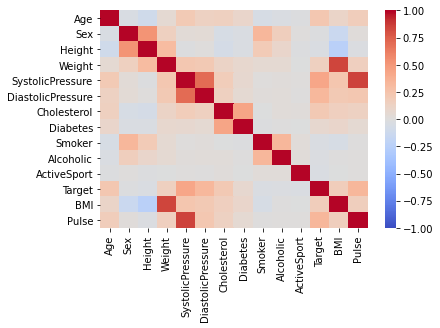

In [38]:
sns.heatmap(df_stroke.corr(), cmap='coolwarm', center=0,vmin=-1, vmax=1);

From the correlation matrix, we can see that the target is more correlated to Cholesterol, Systolic and diastolic pressures and Age. However, the new feature created BMI does not seem to add any relevant information.

Having irrelevant features in data can decrease the accuracy of the models and make the model learn based on irrelevant features. High correlation within independent features means that they represent the same thing and when you drop one of them, you do not lose much quality data.

I will do feature selection before storing the cleaned dataset.

Again, the goal is to have features with good correlation with the target and low correlation with any independent feature. Attending to this explanation and the above correlation matrix I will discard 'BMI', 'Weight', 'Diabetes', 'Sex', 'Height', 'Smoker', 'Alcoholic', 'ActiveSport'

In [39]:
df_stroke = df_stroke.drop(['Sex', 'Height', 'Weight', 'Diabetes', 'Smoker', 'Alcoholic',
       'ActiveSport', 'BMI'], axis=1)

In [40]:
# After cleaning, exploring and analyzing the dataset, I save if for modeling the stroke classifier
df_stroke.to_csv('stroke_data_for_modeling.csv', sep=';', index=False)